# ML Week 4 - Combining EDA and K-Means
##### We've now learned the basics of EDA, and created the K-Means algorithm from scratch. Let's combine them: we'll clean up a dataset and then apply kmeans on it.
##### This time we also answer the question of deciding how many clusters is optimal

### Datset
We will be using a ceramics dataset from Peru.

The dataset can be downloaded here:
https://zenodo.org/records/13227959

The associated publication is:

Glascock et al. 2019, https://doi.org/10.1017/laq.2019.85

## Importing Packages

In [213]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Import Data and Examine DataFrame
##### Let's look at the first few rows and see what we have

In [2]:
# Let's read in our data
filepath = "./"  # This can help if the file is in a different folder. Here we just use "./" which means "the file is in this folder"
filename = "Matsumoto_GMP001-225.csv"

df_raw = pd.read_csv(filepath + filename)

df_raw.head()

,ANID,Alt_ID,Standard,Investigator,Source,Region,Country,State/Province,County/District,Subregion,...,Zr,Al,Ba,Ca,Dy,K,Mn,Na,Ti,V
0,GMP001,NaN,SRM-1633b,"Matsumoto, Go",Sicán Archaeological Project,South America,Peru,Lambayeque,Ferreñafe,La Leche Valley,...,134.239,85528.0,504.3,14244.3,4.251,19868.5,879.8,11383.3,4860.9,117.7
1,GMP002,NaN,SRM-1633b,"Matsumoto, Go",Sicán Archaeological Project,South America,Peru,Lambayeque,Ferreñafe,La Leche Valley,...,128.146,84291.0,491.0,14103.6,3.979,17577.7,937.6,10884.3,4471.7,119.0
2,GMP003,NaN,SRM-1633b,"Matsumoto, Go",Sicán Archaeological Project,South America,Peru,Lambayeque,Ferreñafe,La Leche Valley,...,154.268,79324.6,557.5,13546.8,3.255,16001.5,710.9,17478.3,4139.0,120.9
3,GMP004,NaN,SRM-1633b,"Matsumoto, Go",Sicán Archaeological Project,South America,Peru,Lambayeque,Ferreñafe,La Leche Valley,...,153.187,91631.5,547.1,16952.5,4.177,19046.2,744.6,12144.9,5602.5,121.1
4,GMP005,NaN,SRM-1633b,"Matsumoto, Go",Sicán Archaeological Project,South America,Peru,Lambayeque,Ferreñafe,La Leche Valley,...,120.762,94324.8,533.4,10256.3,4.289,22621.7,685.9,19269.2,4518.5,133.8


## Taking a look at the column names

In [3]:
# Let's see our columns
columns = df_raw.columns
for i in range(len(columns)):
    print(str(i) + ' ' + columns[i])

0 ANID
1 Alt_ID
2 Standard
3 Investigator
4 Source
5 Region
6 Country
7 State/Province
8 County/District
9 Subregion
10 Site_Name
11 Site_Number
12 Material
13 Ware
14 Ceramic_Type
15 Form
16 Exterior_Decoration
17 Interior_Decoration
18 Paste_Color
19 Major_Temper
20 Minor_Temper
21 Culture
22 Context
23 Provenience
24 Era/Period
25 Date_Range
26 Picture
27 Comments
28 Notes
29 Chemgrp
30 Spare_ANID
31 Long_RDF
32 Long_Date
33 Short_RDF
34 Short_Date
35 As
36 La
37 Lu
38 Nd
39 Sm
40 U
41 Yb
42 Ce
43 Co
44 Cr
45 Cs
46 Eu
47 Fe
48 Hf
49 Ni
50 Rb
51 Sb
52 Sc
53 Sr
54 Ta
55 Tb
56 Th
57 Zn
58 Zr
59 Al
60 Ba
61 Ca
62 Dy
63 K
64 Mn
65 Na
66 Ti
67 V


## Dropping columns we don't need

In [4]:
# Let's look at the unique items for the columns

for column in df_raw.columns:
    print('-------')
    print(column)
    print("Set size: " + str(len(df_raw[column].unique())))
    print(df_raw[column].unique())

-------
ANID
Set size: 225
['GMP001' 'GMP002' 'GMP003' 'GMP004' 'GMP005' 'GMP006' 'GMP007' 'GMP008'
 'GMP009' 'GMP010' 'GMP011' 'GMP012' 'GMP013' 'GMP014' 'GMP015' 'GMP016'
 'GMP017' 'GMP018' 'GMP019' 'GMP020' 'GMP021' 'GMP022' 'GMP023' 'GMP024'
 'GMP025' 'GMP026' 'GMP027' 'GMP028' 'GMP029' 'GMP030' 'GMP031' 'GMP032'
 'GMP033' 'GMP034' 'GMP035' 'GMP036' 'GMP037' 'GMP038' 'GMP039' 'GMP040'
 'GMP041' 'GMP042' 'GMP043' 'GMP044' 'GMP045' 'GMP046' 'GMP047' 'GMP048'
 'GMP049' 'GMP050' 'GMP051' 'GMP052' 'GMP053' 'GMP054' 'GMP055' 'GMP056'
 'GMP057' 'GMP058' 'GMP059' 'GMP060' 'GMP061' 'GMP062' 'GMP063' 'GMP064'
 'GMP065' 'GMP066' 'GMP067' 'GMP068' 'GMP069' 'GMP070' 'GMP071' 'GMP072'
 'GMP073' 'GMP074' 'GMP075' 'GMP076' 'GMP077' 'GMP078' 'GMP079' 'GMP080'
 'GMP081' 'GMP082' 'GMP083' 'GMP084' 'GMP085' 'GMP086' 'GMP087' 'GMP088'
 'GMP089' 'GMP090' 'GMP091' 'GMP092' 'GMP093' 'GMP094' 'GMP095' 'GMP096'
 'GMP097' 'GMP098' 'GMP099' 'GMP100' 'GMP101' 'GMP102' 'GMP103' 'GMP104'
 'GMP105' 'GMP106' 'GMP1

In [5]:
# So many of the columns have only a single value for all entries. This is useless for us as it has no predictive power. We can drop them

for column in df_raw.columns:
    if len(df_raw[column].unique()) == 1:
        df_raw = df_raw.drop(columns=column)

In [6]:
df_raw.head()

,ANID,Ceramic_Type,Interior_Decoration,Spare_ANID,Long_RDF,Long_Date,Short_RDF,Short_Date,As,La,...,Zr,Al,Ba,Ca,Dy,K,Mn,Na,Ti,V
0,GMP001,Plainware,plain,GMP001,AMB2,04/13/14,ADF1-S,04/11/14,13.808,31.011,...,134.239,85528.0,504.3,14244.3,4.251,19868.5,879.8,11383.3,4860.9,117.7
1,GMP002,Plainware,plain,GMP002,AMB2,04/13/14,ADF1-S,04/11/14,15.712,28.909,...,128.146,84291.0,491.0,14103.6,3.979,17577.7,937.6,10884.3,4471.7,119.0
2,GMP003,Plainware,plain,GMP003,AMB2,04/13/14,ADF1-S,04/11/14,20.534,25.983,...,154.268,79324.6,557.5,13546.8,3.255,16001.5,710.9,17478.3,4139.0,120.9
3,GMP004,Plainware,plain,GMP004,AMB2,04/13/14,ADF1-S,04/11/14,8.339,27.654,...,153.187,91631.5,547.1,16952.5,4.177,19046.2,744.6,12144.9,5602.5,121.1
4,GMP005,Plainware,plain,GMP005,AMB2,04/13/14,ADF1-S,04/11/14,32.849,24.667,...,120.762,94324.8,533.4,10256.3,4.289,22621.7,685.9,19269.2,4518.5,133.8


In [7]:
# Let's see what we have now

for column in df_raw.columns:
    print('-------')
    print(column)
    print("Set size: " + str(len(df_raw[column].unique())))
    print(df_raw[column].unique())

-------
ANID
Set size: 225
['GMP001' 'GMP002' 'GMP003' 'GMP004' 'GMP005' 'GMP006' 'GMP007' 'GMP008'
 'GMP009' 'GMP010' 'GMP011' 'GMP012' 'GMP013' 'GMP014' 'GMP015' 'GMP016'
 'GMP017' 'GMP018' 'GMP019' 'GMP020' 'GMP021' 'GMP022' 'GMP023' 'GMP024'
 'GMP025' 'GMP026' 'GMP027' 'GMP028' 'GMP029' 'GMP030' 'GMP031' 'GMP032'
 'GMP033' 'GMP034' 'GMP035' 'GMP036' 'GMP037' 'GMP038' 'GMP039' 'GMP040'
 'GMP041' 'GMP042' 'GMP043' 'GMP044' 'GMP045' 'GMP046' 'GMP047' 'GMP048'
 'GMP049' 'GMP050' 'GMP051' 'GMP052' 'GMP053' 'GMP054' 'GMP055' 'GMP056'
 'GMP057' 'GMP058' 'GMP059' 'GMP060' 'GMP061' 'GMP062' 'GMP063' 'GMP064'
 'GMP065' 'GMP066' 'GMP067' 'GMP068' 'GMP069' 'GMP070' 'GMP071' 'GMP072'
 'GMP073' 'GMP074' 'GMP075' 'GMP076' 'GMP077' 'GMP078' 'GMP079' 'GMP080'
 'GMP081' 'GMP082' 'GMP083' 'GMP084' 'GMP085' 'GMP086' 'GMP087' 'GMP088'
 'GMP089' 'GMP090' 'GMP091' 'GMP092' 'GMP093' 'GMP094' 'GMP095' 'GMP096'
 'GMP097' 'GMP098' 'GMP099' 'GMP100' 'GMP101' 'GMP102' 'GMP103' 'GMP104'
 'GMP105' 'GMP106' 'GMP1

In [8]:
# A lot of these are just cataloguing or date info. We can throw them out.

df_raw = df_raw.drop(columns=['ANID','Spare_ANID','Long_RDF','Long_Date','Short_RDF','Short_Date'])

In [9]:
df_raw.head()

,Ceramic_Type,Interior_Decoration,As,La,Lu,Nd,Sm,U,Yb,Ce,...,Zr,Al,Ba,Ca,Dy,K,Mn,Na,Ti,V
0,Plainware,plain,13.808,31.011,0.384,25.331,6.101,4.202,2.785,62.092,...,134.239,85528.0,504.3,14244.3,4.251,19868.5,879.8,11383.3,4860.9,117.7
1,Plainware,plain,15.712,28.909,0.384,40.023,6.270,3.455,2.535,59.037,...,128.146,84291.0,491.0,14103.6,3.979,17577.7,937.6,10884.3,4471.7,119.0
2,Plainware,plain,20.534,25.983,0.369,27.267,5.455,3.899,2.667,53.925,...,154.268,79324.6,557.5,13546.8,3.255,16001.5,710.9,17478.3,4139.0,120.9
3,Plainware,plain,8.339,27.654,0.377,23.345,5.651,4.677,2.774,56.745,...,153.187,91631.5,547.1,16952.5,4.177,19046.2,744.6,12144.9,5602.5,121.1
4,Plainware,plain,32.849,24.667,0.409,21.267,5.763,4.400,2.564,51.557,...,120.762,94324.8,533.4,10256.3,4.289,22621.7,685.9,19269.2,4518.5,133.8


In [10]:
# Let's check what percentage of the columns are empty (NaN values) using the "isna" method

length = len(df_raw)

for column in df_raw.columns:
    percent_NaN = df_raw[column].isna().sum()/length*100
    print('-------')
    print(column)
    print(percent_NaN)

-------
Ceramic_Type
0.0
-------
Interior_Decoration
0.0
-------
As
0.0
-------
La
0.0
-------
Lu
0.0
-------
Nd
0.0
-------
Sm
0.0
-------
U
0.0
-------
Yb
0.0
-------
Ce
0.0
-------
Co
0.0
-------
Cr
0.0
-------
Cs
0.0
-------
Eu
0.0
-------
Fe
0.0
-------
Hf
0.0
-------
Ni
0.0
-------
Rb
0.0
-------
Sb
0.0
-------
Sc
0.0
-------
Sr
0.0
-------
Ta
0.0
-------
Tb
0.0
-------
Th
0.0
-------
Zn
0.0
-------
Zr
0.0
-------
Al
0.0
-------
Ba
0.0
-------
Ca
0.0
-------
Dy
0.0
-------
K
0.0
-------
Mn
0.0
-------
Na
0.0
-------
Ti
0.0
-------
V
0.0


## How do we deal with string columns when using ML?

ML Systems can only handle numeric data. If we think a column could be interesting, but it contains tabular data, we have a few questions to ask:

* How many unique values are there in the column?

* Are the values somehow related to each other?

* Do the values represent an order?

## Case 1: Unrelated column values, and not too many unique values
#### Non-numeric and unrelated column values are called '**categorical**'. Here we use "one-hot encoding". We make a new column for each unique value, and assign 1 if that row is labelled as fitting into the data

In [11]:
df_raw = pd.get_dummies(df_raw, columns=['Ceramic_Type'], dtype=int)

In [12]:
df_raw.head()

,Interior_Decoration,As,La,Lu,Nd,Sm,U,Yb,Ce,Co,...,Ba,Ca,Dy,K,Mn,Na,Ti,V,Ceramic_Type_Cajamarca Costeño (a.k.a. Sicán Painted Dish),Ceramic_Type_Plainware
0,plain,13.808,31.011,0.384,25.331,6.101,4.202,2.785,62.092,14.354,...,504.3,14244.3,4.251,19868.5,879.8,11383.3,4860.9,117.7,0,1
1,plain,15.712,28.909,0.384,40.023,6.270,3.455,2.535,59.037,14.507,...,491.0,14103.6,3.979,17577.7,937.6,10884.3,4471.7,119.0,0,1
2,plain,20.534,25.983,0.369,27.267,5.455,3.899,2.667,53.925,12.563,...,557.5,13546.8,3.255,16001.5,710.9,17478.3,4139.0,120.9,0,1
3,plain,8.339,27.654,0.377,23.345,5.651,4.677,2.774,56.745,12.051,...,547.1,16952.5,4.177,19046.2,744.6,12144.9,5602.5,121.1,0,1
4,plain,32.849,24.667,0.409,21.267,5.763,4.400,2.564,51.557,13.746,...,533.4,10256.3,4.289,22621.7,685.9,19269.2,4518.5,133.8,0,1


## Case 2: Related column values
#### Related column values are called '**Ordinal**'

Examples:
* Wear: Low, Moderate, Severe
* Age: Early Kingdom, Middle Kingdom, Late Kingdom
* Property Value: none, cheap, moderate, expensive

#### To deal with these we need to assign values between 0 and 1. The exact assignment will be case dependant

In [13]:
# Here, for the Interior_Decoration column, we set plain to be 0 and painted (which is the opposite of plain) to be 1
df_raw.loc[df_raw['Interior_Decoration'] == 'plain', 'Interior_Decoration'] = 0
df_raw.loc[df_raw['Interior_Decoration'] == 'semi-painted', 'Interior_Decoration'] = 0.5
df_raw.loc[df_raw['Interior_Decoration'] == 'painted', 'Interior_Decoration'] = 1

# Note: This is a bit contrived. In general this is more iportant for ordinal columns that have more than one entry, but here we actually have only 2, so it is basically the same as one-hot encoding. But I wanted to use a real dataset and this is the best I could find.

In [14]:
df_raw.head()

,Interior_Decoration,As,La,Lu,Nd,Sm,U,Yb,Ce,Co,...,Ba,Ca,Dy,K,Mn,Na,Ti,V,Ceramic_Type_Cajamarca Costeño (a.k.a. Sicán Painted Dish),Ceramic_Type_Plainware
0,0,13.808,31.011,0.384,25.331,6.101,4.202,2.785,62.092,14.354,...,504.3,14244.3,4.251,19868.5,879.8,11383.3,4860.9,117.7,0,1
1,0,15.712,28.909,0.384,40.023,6.270,3.455,2.535,59.037,14.507,...,491.0,14103.6,3.979,17577.7,937.6,10884.3,4471.7,119.0,0,1
2,0,20.534,25.983,0.369,27.267,5.455,3.899,2.667,53.925,12.563,...,557.5,13546.8,3.255,16001.5,710.9,17478.3,4139.0,120.9,0,1
3,0,8.339,27.654,0.377,23.345,5.651,4.677,2.774,56.745,12.051,...,547.1,16952.5,4.177,19046.2,744.6,12144.9,5602.5,121.1,0,1
4,0,32.849,24.667,0.409,21.267,5.763,4.400,2.564,51.557,13.746,...,533.4,10256.3,4.289,22621.7,685.9,19269.2,4518.5,133.8,0,1


## Case 3: Unrelated column values, with many unique values ("many" is case dependant)
##### Different solutions exist: Similar values can be grouped, the column can simply be dropped, or embedding vectors can be created for each value (we will visit the last step probably in next semester's cousre)
##### For now we won't worry about this case, but it could come up in one of your exam datasets

## Switching to NumPy
##### We now have a fully numeric dataset. Hooray! We can switch to NumPy

In [139]:
X = df_raw.to_numpy(dtype=float)

In [140]:
X

array([[  0.   ,  13.808,  31.011, ..., 117.7  ,   0.   ,   1.   ],
       [  0.   ,  15.712,  28.909, ..., 119.   ,   0.   ,   1.   ],
       [  0.   ,  20.534,  25.983, ..., 120.9  ,   0.   ,   1.   ],
       ...,
       [  0.   ,  22.993,  29.741, ..., 145.1  ,   0.   ,   1.   ],
       [  0.   ,  17.792,  35.496, ..., 123.1  ,   0.   ,   1.   ],
       [  1.   ,  11.884,  48.267, ..., 140.8  ,   1.   ,   0.   ]],
      shape=(225, 36))

## Making the Data more "ML Friendly"
##### ML works better when the dataset is more uniform. That is to say, it's not great when 1 column is between -1000 and +100000 and another is between 0 and 1. To deal with this there are multiple methods. The two most common are:

* Normalization: Scale every column so that it falls between 0 and 1
* Standadization: Scale and shift every column so that they have their mean at 0 and their standard deviation is 1.

<div>
<img src="Normalization.avif" width="500"/>
<img src="Standardization.avif" width="500"/>
</div>
Source: https://www.datacamp.com/tutorial/normalization-vs-standardization

In [ ]:
# Let's compare standardization and normalization

from sklearn.preprocessing import StandardScaler, normalize

X_normalized = normalize(X, axis=0, norm='max')
X_standardized = StandardScaler().fit(X).transform(X)

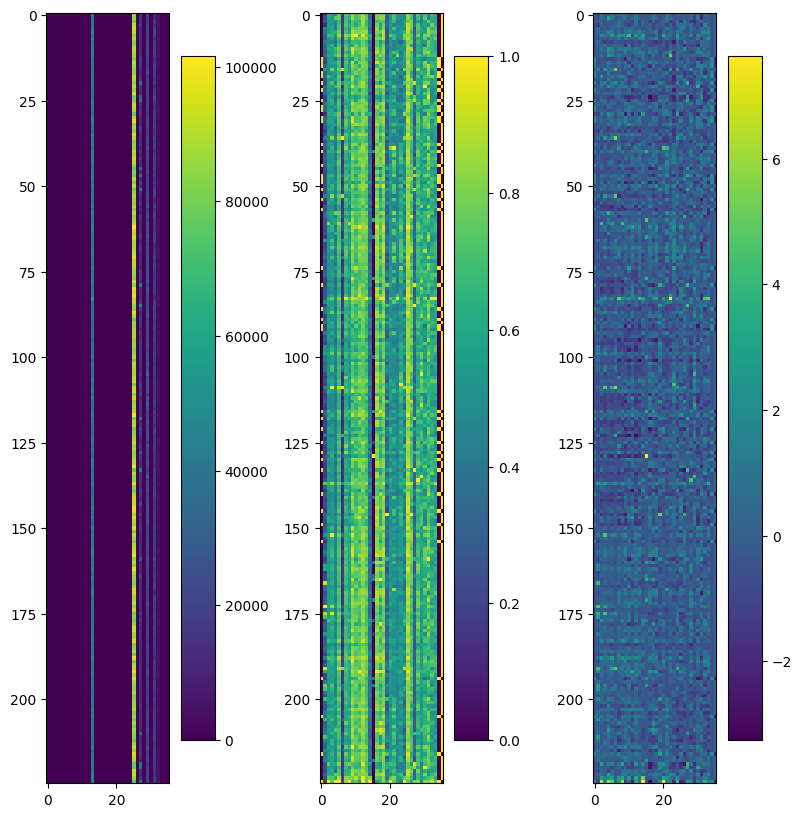

In [ ]:
from matplotlib import pyplot as plt

f, ax = plt.subplots(1,3, figsize=(10,10))
im1 = ax[0].imshow(X)
im2 = ax[1].imshow(X_normalized)
im3 = ax[2].imshow(X_standardized)
f.colorbar(im1)
f.colorbar(im2)
f.colorbar(im3)

In [186]:
# For our purpose, standardization is probably the best choice (notice with normalization some of the columns are dominated by outliers - a few yellow dots while the rest is purple)

X = X_standardized

## This time we will use Scikit-Learn for Kmeans

In [187]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3).fit(X)

In [188]:
model

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [189]:
model.labels_

array([2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2,
       1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 0, 2, 0, 0, 0,
       2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 2, 2, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2,
       2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 0,
       0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 2, 0,
       1, 0, 2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 2, 2, 0, 1,
       1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 2,
       1, 2, 2, 2, 2], dtype=int32)

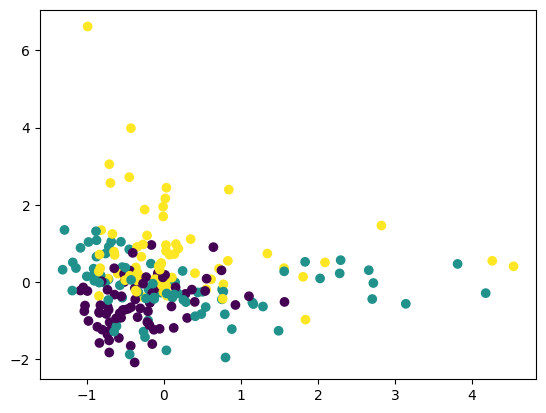

In [190]:
plt.scatter(x = X[:,1], y = X[:,2], c=model.labels_)


## Choosing the Number of Clusters
##### We can try many different K values, and then assess how good they are based on two metrics:
* Sum-of-Squares (SSE): This is a measure of how "tight" the individual clusters are. Lower values are better, but we don't want to have too many clusters. Finding the middle-ground is called the "Elbow Test"
* Silhouette Score: This is a measure of the average "niceness" for how well the points fit into their respective clusters. Higher values are better.

In general, we also don't want to have too many clusters.

In [218]:
from sklearn.metrics import silhouette_score

K = range(2, 20)
fits = []
SSE = []
scores = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X)
    
    # append the model to fits
    fits.append(model)
    
    # Append the SSE and silhouette scores
    SSE.append(model.inertia_)
    score = silhouette_score(X, model.labels_, metric='euclidean')
    scores.append(score)

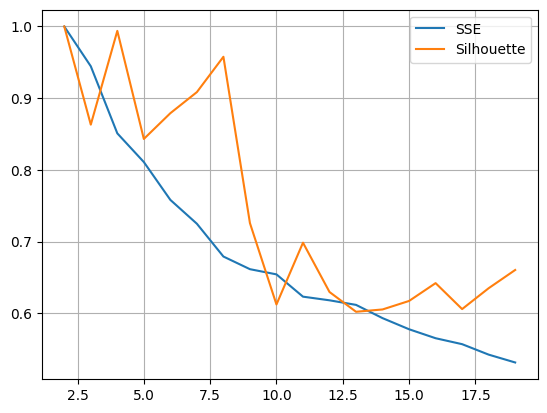

In [226]:
# When we plot these we can normalize them by dividing by the max

plt.plot(K, SSE/np.max(SSE), label="SSE")
plt.plot(K, scores/np.max(scores), label="Silhouette")
plt.grid()
plt.legend()

## We see 8 clusters seems to work well
##### Beyond this the SSE slightly flattens out and the Silhouette drops fast. Let's look a bit at the clusters we get.

In [227]:
pred = fits[6].labels_
pred

array([3, 3, 5, 5, 3, 3, 4, 3, 5, 5, 3, 3, 3, 7, 1, 1, 6, 1, 1, 5, 7, 3,
       7, 5, 7, 7, 3, 1, 1, 5, 1, 1, 3, 5, 5, 3, 6, 2, 1, 3, 1, 3, 3, 3,
       1, 7, 2, 7, 1, 7, 3, 7, 2, 0, 1, 5, 2, 7, 3, 0, 3, 3, 3, 3, 3, 2,
       6, 3, 3, 3, 2, 3, 2, 2, 1, 5, 5, 2, 2, 7, 2, 2, 3, 4, 3, 7, 7, 6,
       2, 7, 5, 7, 7, 5, 2, 0, 2, 2, 0, 6, 2, 0, 2, 0, 0, 2, 2, 3, 2, 6,
       3, 5, 2, 2, 2, 2, 1, 3, 7, 2, 2, 7, 5, 0, 2, 1, 5, 2, 1, 0, 1, 2,
       3, 7, 2, 2, 5, 6, 5, 5, 7, 3, 2, 2, 2, 1, 2, 2, 2, 2, 3, 5, 6, 5,
       7, 5, 3, 3, 3, 7, 3, 5, 3, 3, 5, 3, 5, 5, 3, 3, 3, 3, 3, 6, 5, 6,
       5, 5, 5, 3, 3, 5, 5, 3, 2, 5, 3, 3, 3, 3, 3, 6, 3, 3, 1, 5, 0, 5,
       5, 5, 5, 3, 2, 3, 5, 1, 5, 3, 5, 3, 5, 5, 5, 5, 3, 5, 1, 3, 3, 4,
       7, 3, 3, 4, 4], dtype=int32)

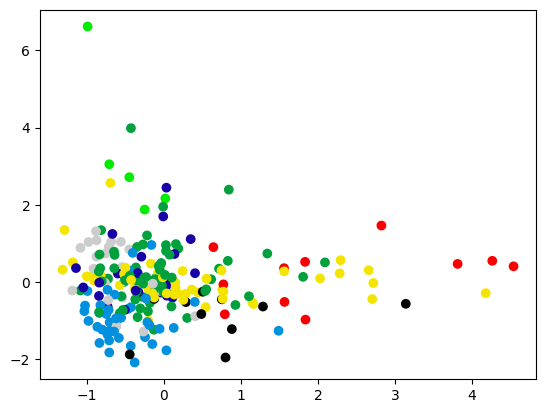

In [236]:
import matplotlib.cm as cm

plt.scatter(x = X[:,1], y = X[:,2], c=pred, cmap=cm.nipy_spectral)

In [ ]:
# We can check how many 

from collections import Counter

Counter(pred)

Counter({np.int32(3): 66,
         np.int32(5): 47,
         np.int32(2): 41,
         np.int32(7): 23,
         np.int32(1): 22,
         np.int32(6): 11,
         np.int32(0): 10,
         np.int32(4): 5})

In [231]:
df_raw[pred == 4]

,Interior_Decoration,As,La,Lu,Nd,Sm,U,Yb,Ce,Co,...,Ba,Ca,Dy,K,Mn,Na,Ti,V,Ceramic_Type_Cajamarca Costeño (a.k.a. Sicán Painted Dish),Ceramic_Type_Plainware
6,0,22.902,33.695,0.455,27.635,6.858,5.834,3.156,70.154,16.084,...,533.1,14259.9,4.557,18404.8,986.8,18616.9,4597.4,132.7,0,1
83,0,19.973,32.750,0.516,28.294,6.556,4.607,3.802,68.728,16.242,...,424.2,13288.2,4.497,20336.8,1034.4,12432.2,7074.5,192.4,0,1
219,0,14.957,36.592,0.405,33.071,6.617,3.609,2.778,75.920,11.728,...,359.2,41324.9,4.174,15748.5,830.5,17814.0,5113.0,131.8,0,1
223,0,17.792,35.496,0.495,33.520,7.064,4.083,3.176,75.618,13.521,...,471.1,14464.3,4.041,18488.8,809.6,15946.3,5420.8,123.1,0,1
224,1,11.884,48.267,0.504,54.366,8.001,4.511,3.187,94.770,11.810,...,432.2,35566.5,4.671,16734.9,1019.5,18484.1,6499.3,140.8,1,0


## This is as far as I can bring you!
## I'm not an archaeologist :)

<div>
<img src="maxresdefault.jpg" width="500"/>
</div>

## Let's look a little more at what some other teams are doing

##### Studying Weaning Patterns
https://www.sciencedirect.com/science/article/pii/S2352409X2200428X

The team uses the Elbow method to decide on K=3. Then they interpret the 3 gropus to relate to the stability/quality of the breastfeeding received by those individuals.

##### Identifying Sites
https://www.mdpi.com/2076-3263/13/6/179

The team uses the Elbow method to decide on K=5. They then look for sand dunes that fall in the same cluster as those known to house archaeological sites.

## But remember, K-means clustering has its limits

<div>
<img src="K-means_Limits.png" width="200"/>
</div>

# Exercises

## Exercise 1

Although using the "max" option for normalization doesn't work great, the "l2" option (short for the L2 norm) is quite robust. See if the clustering is the same when L2 normalization is applied.

## Exercise 2

In fact, KMeans does not work for high dimensions (a large number of columns). 20-30 is generally "borderline" for what is performant.

We had 36 here, which is likely too many.

The solution is to reduce dimension by combining columns. This can be done manually by checking which columns are highly correlated (we will see this later), but in general this is tedious.

A quicker solution is using Principal Component Analysis (PCA). This is a clever mathematical tool to automatically decide which columns are related, and combine them in an optimal way for subsequent clustering (or other ML stuff).

The next cell reduces the dimensionality for 36 to 5.

Retry the clustering on this new data, including SSE and Silhouette scores.

In [241]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 5).fit_transform(X)